<a href="https://colab.research.google.com/github/NataliaNinoV/Viajero/blob/main/Red_Neuronal_El_problema_del_viajero_ambulante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import tensorflow as tf

# Crear matriz de distancia
n = 10  # número de ciudades
np.random.seed(42)
locations = np.random.rand(n, 2)
distances = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i != j:
            distances[i][j] = np.linalg.norm(locations[i] - locations[j])

# Crear modelo de red neuronal
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(n,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(n, activation='softmax'))


In [ ]:

# Función de pérdida y optimizador
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.gather_nd(distances, tf.stack([tf.range(n), tf.cast(tf.argmax(y_pred, axis=1), tf.int32)], axis=1)))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)


In [ ]:

# Entrenamiento del modelo
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.fit(np.eye(n), np.eye(n), epochs=10000, verbose=0)

# Obtener la solución del problema del viajero ambulante
solution = np.zeros(n, dtype=np.int32)
visited = np.zeros(n, dtype=np.bool)
for i in range(n):
    logits = model.predict(np.expand_dims(solution, axis=0)).ravel()
    logits[visited] = -1e9  # establecer la probabilidad de ciudades visitadas a cero
    solution[i] = np.argmax(logits)
    visited[solution[i]] = True

print('La solución encontrada es:', solution)


1/1 [==============================] - 0s 92ms/step


<ipython-input-7-528b643f0722>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visited = np.zeros(n, dtype=np.bool)


1/1 [==============================] - 0s 21ms/step
La solución encontrada es: [3 0 8 2 7 4 5 6 9 1]


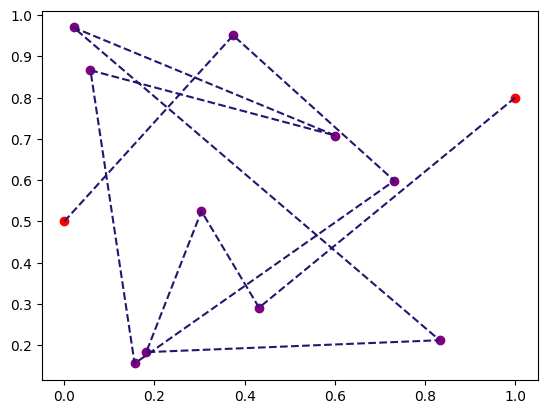

In [ ]:
#locations = np.random.rand(n, 2)
import matplotlib.pyplot as plt
# Punto inicial constante
p_inicial = [0, 0.5]
p_final = [1, 0.8]

# Concatenar los puntos y agregar el punto inicial constante
puntos = np.vstack((p_inicial, locations, p_final ))

# Graficar los puntos
plt.plot(p_inicial[0], p_inicial[1],'o',color='red') #Punto inicial
plt.plot(p_final[0], p_final[1],'o',color='red') #Punto final
plt.plot(locations[:,0], locations[:,1],'o',color='purple')
plt.plot(puntos[:,0], puntos[:,1],'--',color='#26156F')

plt.show()

